In [57]:
import os
import sys

import torch.nn as nn
import torch.nn.init as init

In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F


In [59]:
#Loading Pretrained model
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [60]:
print(model.parameters)

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [65]:
#Replacing the output layer and freezing all the hidden layers excluding the replaced output layer
model.fc = nn.Linear(512, 10)
for param in model.parameters(): 
  param.requires_grad = False
for param in model.fc.parameters(): 
  param.requires_grad = True


In [66]:
for param in model.parameters():
  print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True


In [67]:
print(model.parameters)

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [86]:
#Defining Transformations
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import os
import argparse


device = 'cuda' if torch.cuda.is_available() else 'cpu'
best_acc = 0  # best test accuracy
start_epoch = 0  # start from epoch 0 or last checkpoint epoch

# Data
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


==> Preparing data..


In [87]:
#Loading Dataset and DataLoader
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform_train)


trainset,validationset=torch.utils.data.random_split(trainset,[40000,10000])

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=60, shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(
    validationset, batch_size=60, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=100, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [69]:
#Defining instance of ResNet18 model, Loss function, Optimizer and Scheduler
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15)

In [44]:
def train(model_train,ep):

  model_train.eval()
  model_train.train()
  losses=[]
  for epoch in range(ep):
    running_loss=0
    for i,data in enumerate(trainloader,0):
      inputs,labels=data
      inputs,labels=inputs.to(device),labels.to(device)
      optimizer.zero_grad()
      outputs=model_train(inputs)
      loss=criterion(outputs,labels)
      loss.backward()
      optimizer.step()
      scheduler.step()
      running_loss+=loss.item()
      if((i+1)%20==0):
        losses.append(running_loss/20)
        print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
        running_loss = 0.0

    
  return losses

In [70]:
losses=train(model,15)

[1,    20] loss: 2.363
[1,    40] loss: 2.210
[1,    60] loss: 2.065
[1,    80] loss: 1.923
[1,   100] loss: 1.805
[1,   120] loss: 1.688
[1,   140] loss: 1.587
[1,   160] loss: 1.521
[1,   180] loss: 1.427
[1,   200] loss: 1.405
[1,   220] loss: 1.388
[1,   240] loss: 1.319
[1,   260] loss: 1.305
[1,   280] loss: 1.247
[1,   300] loss: 1.255
[1,   320] loss: 1.193
[1,   340] loss: 1.173
[1,   360] loss: 1.184
[1,   380] loss: 1.106
[1,   400] loss: 1.101
[1,   420] loss: 1.072
[1,   440] loss: 1.094
[1,   460] loss: 1.100
[1,   480] loss: 1.082
[1,   500] loss: 1.034
[1,   520] loss: 1.011
[1,   540] loss: 1.001
[1,   560] loss: 0.992
[1,   580] loss: 1.010
[1,   600] loss: 1.026
[1,   620] loss: 0.993
[1,   640] loss: 0.972
[1,   660] loss: 0.963
[2,    20] loss: 0.960
[2,    40] loss: 0.959
[2,    60] loss: 0.924
[2,    80] loss: 0.913
[2,   100] loss: 0.905
[2,   120] loss: 0.912
[2,   140] loss: 0.900
[2,   160] loss: 0.936
[2,   180] loss: 0.924
[2,   200] loss: 0.872
[2,   220] 

In [72]:
print(len(losses))

495


Text(0, 0.5, 'Loss')

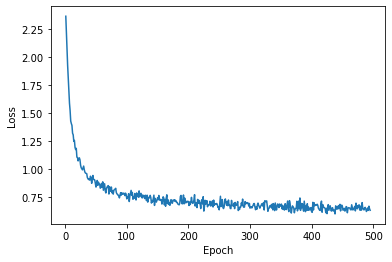

In [73]:
#Plotting Loss over Epochs in Training
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(1, len(losses), len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [74]:
#Saving updated parameters
PATH='.cifar_path_from_pretrain'
torch.save(model.state_dict(),PATH)

In [75]:
#Testing Validation Set
correct = 0
total = 0

with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images,labels=images.to(device),labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 77 %


In [76]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels=images.to(device),labels.to(device)

        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 19.0 %
Accuracy for class: car   is 22.0 %
Accuracy for class: bird  is 29.5 %
Accuracy for class: cat   is 17.2 %
Accuracy for class: deer  is 18.0 %
Accuracy for class: dog   is 11.7 %
Accuracy for class: frog  is 17.7 %
Accuracy for class: horse is 24.4 %
Accuracy for class: ship  is 22.3 %
Accuracy for class: truck is 20.3 %


In [89]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels=images.to(device),labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 77 %


In [78]:
torch.save(model, 'checkpoint0')

# Then later:
model1 = torch.load('checkpoint0')

In [79]:
print(model1.parameters)

<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [54]:
print(model1.layer4.parameters)

<bound method Module.parameters of Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (downsample): Sequential(
      (0): Conv2d(256, 512, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): BasicBlock(
    (conv1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False

In [80]:
#Unfreezing layer 4
for param in model1.parameters(): 
  param.requires_grad = False
for param in model1.fc.parameters(): 
  param.requires_grad = True
for param in model1.layer4.parameters():
  param.requires_grad = True

In [81]:
#Defining Loss function, Optimizer and Scheduler
model1 = model1.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=15)

In [82]:
losses1=train(model1,15)

[1,    20] loss: 0.633
[1,    40] loss: 0.604
[1,    60] loss: 0.579
[1,    80] loss: 0.560
[1,   100] loss: 0.565
[1,   120] loss: 0.572
[1,   140] loss: 0.573
[1,   160] loss: 0.558
[1,   180] loss: 0.524
[1,   200] loss: 0.539
[1,   220] loss: 0.532
[1,   240] loss: 0.546
[1,   260] loss: 0.492
[1,   280] loss: 0.522
[1,   300] loss: 0.529
[1,   320] loss: 0.505
[1,   340] loss: 0.503
[1,   360] loss: 0.530
[1,   380] loss: 0.495
[1,   400] loss: 0.476
[1,   420] loss: 0.557
[1,   440] loss: 0.527
[1,   460] loss: 0.485
[1,   480] loss: 0.500
[1,   500] loss: 0.478
[1,   520] loss: 0.511
[1,   540] loss: 0.541
[1,   560] loss: 0.441
[1,   580] loss: 0.509
[1,   600] loss: 0.466
[1,   620] loss: 0.484
[1,   640] loss: 0.471
[1,   660] loss: 0.416
[2,    20] loss: 0.379
[2,    40] loss: 0.383
[2,    60] loss: 0.385
[2,    80] loss: 0.386
[2,   100] loss: 0.381
[2,   120] loss: 0.368
[2,   140] loss: 0.408
[2,   160] loss: 0.356
[2,   180] loss: 0.398
[2,   200] loss: 0.363
[2,   220] 

Text(0, 0.5, 'Loss')

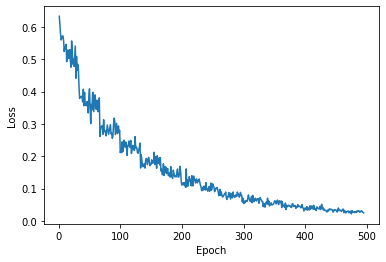

In [83]:
#Plotting Loss over Epochs in Training
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(1, len(losses1), len(losses1)), losses1)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [84]:
#Testing Validation Set
correct = 0
total = 0

with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images,labels=images.to(device),labels.to(device)

        outputs = model1(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 88 %


In [88]:
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images,labels=images.to(device),labels.to(device)

        outputs = model1(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 88 %


In [90]:
torch.save(model1, 'checkpoint1')

# Then later:
model2 = torch.load('checkpoint1')

In [92]:
#Unfreezing layer 3
for param in model2.parameters(): 
  param.requires_grad = False
for param in model2.fc.parameters(): 
  param.requires_grad = True
for param in model2.layer4.parameters():
  param.requires_grad = True
for param in model2.layer3.parameters():
  param.requires_grad = True

In [95]:
#Defining Loss function, Optimizer and Scheduler
model2 = model2.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.001,
                      momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=5)

In [96]:
losses2=train(model2,5)

[1,    20] loss: 0.048
[1,    40] loss: 0.035
[1,    60] loss: 0.038
[1,    80] loss: 0.046
[1,   100] loss: 0.050
[1,   120] loss: 0.043
[1,   140] loss: 0.062
[1,   160] loss: 0.059
[1,   180] loss: 0.045
[1,   200] loss: 0.057
[1,   220] loss: 0.045
[1,   240] loss: 0.034
[1,   260] loss: 0.039
[1,   280] loss: 0.054
[1,   300] loss: 0.034
[1,   320] loss: 0.045
[1,   340] loss: 0.052
[1,   360] loss: 0.047
[1,   380] loss: 0.043
[1,   400] loss: 0.059
[1,   420] loss: 0.040
[1,   440] loss: 0.032
[1,   460] loss: 0.042
[1,   480] loss: 0.046
[1,   500] loss: 0.045
[1,   520] loss: 0.043
[1,   540] loss: 0.031
[1,   560] loss: 0.048
[1,   580] loss: 0.053
[1,   600] loss: 0.056
[1,   620] loss: 0.047
[1,   640] loss: 0.027
[1,   660] loss: 0.038
[2,    20] loss: 0.035
[2,    40] loss: 0.025
[2,    60] loss: 0.029
[2,    80] loss: 0.034
[2,   100] loss: 0.031
[2,   120] loss: 0.035
[2,   140] loss: 0.030
[2,   160] loss: 0.038
[2,   180] loss: 0.027
[2,   200] loss: 0.029
[2,   220] 

Text(0, 0.5, 'Loss')

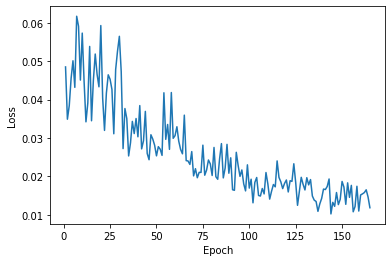

In [97]:
#Plotting Loss over Epochs in Training
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.linspace(1, len(losses2), len(losses2)), losses2)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [98]:
#Testing Validation Set
correct = 0
total = 0

with torch.no_grad():
    for data in validationloader:
        images, labels = data
        images,labels=images.to(device),labels.to(device)

        outputs = model2(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 97 %
